In [76]:
!pip install drawsvg[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.0/627.0 kB 1.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 3.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 3.9 MB/s eta 0:00:00
  Created wheel for pwkit: filename=pwkit-1.2.0-py3-none-any.whl size=514489 sha256=4e899a7d82bd9241046aaa19c22d1ba250f21f8f493aa71c5d637034053a891d
  Stored in directory: /home/jovyan/.cache/pip/wheels/b7/e6/80/e77c114d3395ee545c6987ed11e71155a7a38ea2d74000c015
Successfully built pwkit


In [1]:
import drawsvg as draw
from datetime import datetime, timedelta
import math


In [69]:
birthDay = '05/12/1986'  # Birth date in the MM/DD/YYYY format
lifeExpectancy = 90       # Life expectancy in years

displayWidth = 1080     # Setting the width of the canvas, minimum = 103
boxSpacing = 3
showYear = False
yearSpacing = 3

boxStroke = 'none'
boxFillPast = 'red'
boxFillFuture = 'grey'

In [70]:
birthDate = datetime.strptime(birthDay, '%m/%d/%Y')
birthWeek = birthDate.isocalendar().week
birthYear = birthDate.isocalendar().year
fontSpacing = 0

if showYear:
    fontSpacing += yearSpacing

# TODO: Need to make boxSize account for dynamic textsize and vice versa
boxSize = math.floor(((displayWidth) - (boxSpacing * 51)) / (52 + fontSpacing))

displayHeight = (boxSize + boxSpacing) * lifeExpectancy + boxSpacing

if boxSize <= 0:
    print('!!! displayWidth must be bigger or boxSpacing must be smaller !!!')

In [71]:
d = draw.Drawing(displayWidth, displayHeight, displayInline=True)


In [72]:
year = 1
while year <= lifeExpectancy:
    week = 1
    
    if showYear:
        currentYear = birthYear + year
        d.append(draw.Text(str(currentYear), font_size=boxSize, x=boxSpacing, y=(boxSpacing + boxSize) * year + boxSize))
    
    while week <= 52:
        
        if year > 1 or week > birthWeek:
            boxDate = birthDate + timedelta(weeks=(week-1)) + timedelta(days=365) * (year - 1)
            
            if boxDate < datetime.today():
                boxFill = boxFillPast
            else:
                boxFill = boxFillFuture
                
            x = (boxSize + boxSpacing) * (week - 1) + boxSpacing + (boxSize * fontSpacing)
            y = boxSpacing * year + boxSize * (year - 1)
            r = draw.Rectangle(x, y, boxSize, boxSize, fill=boxFill, stroke=boxStroke)
            d.append(r)
        
        week += 1
    
    year += 1

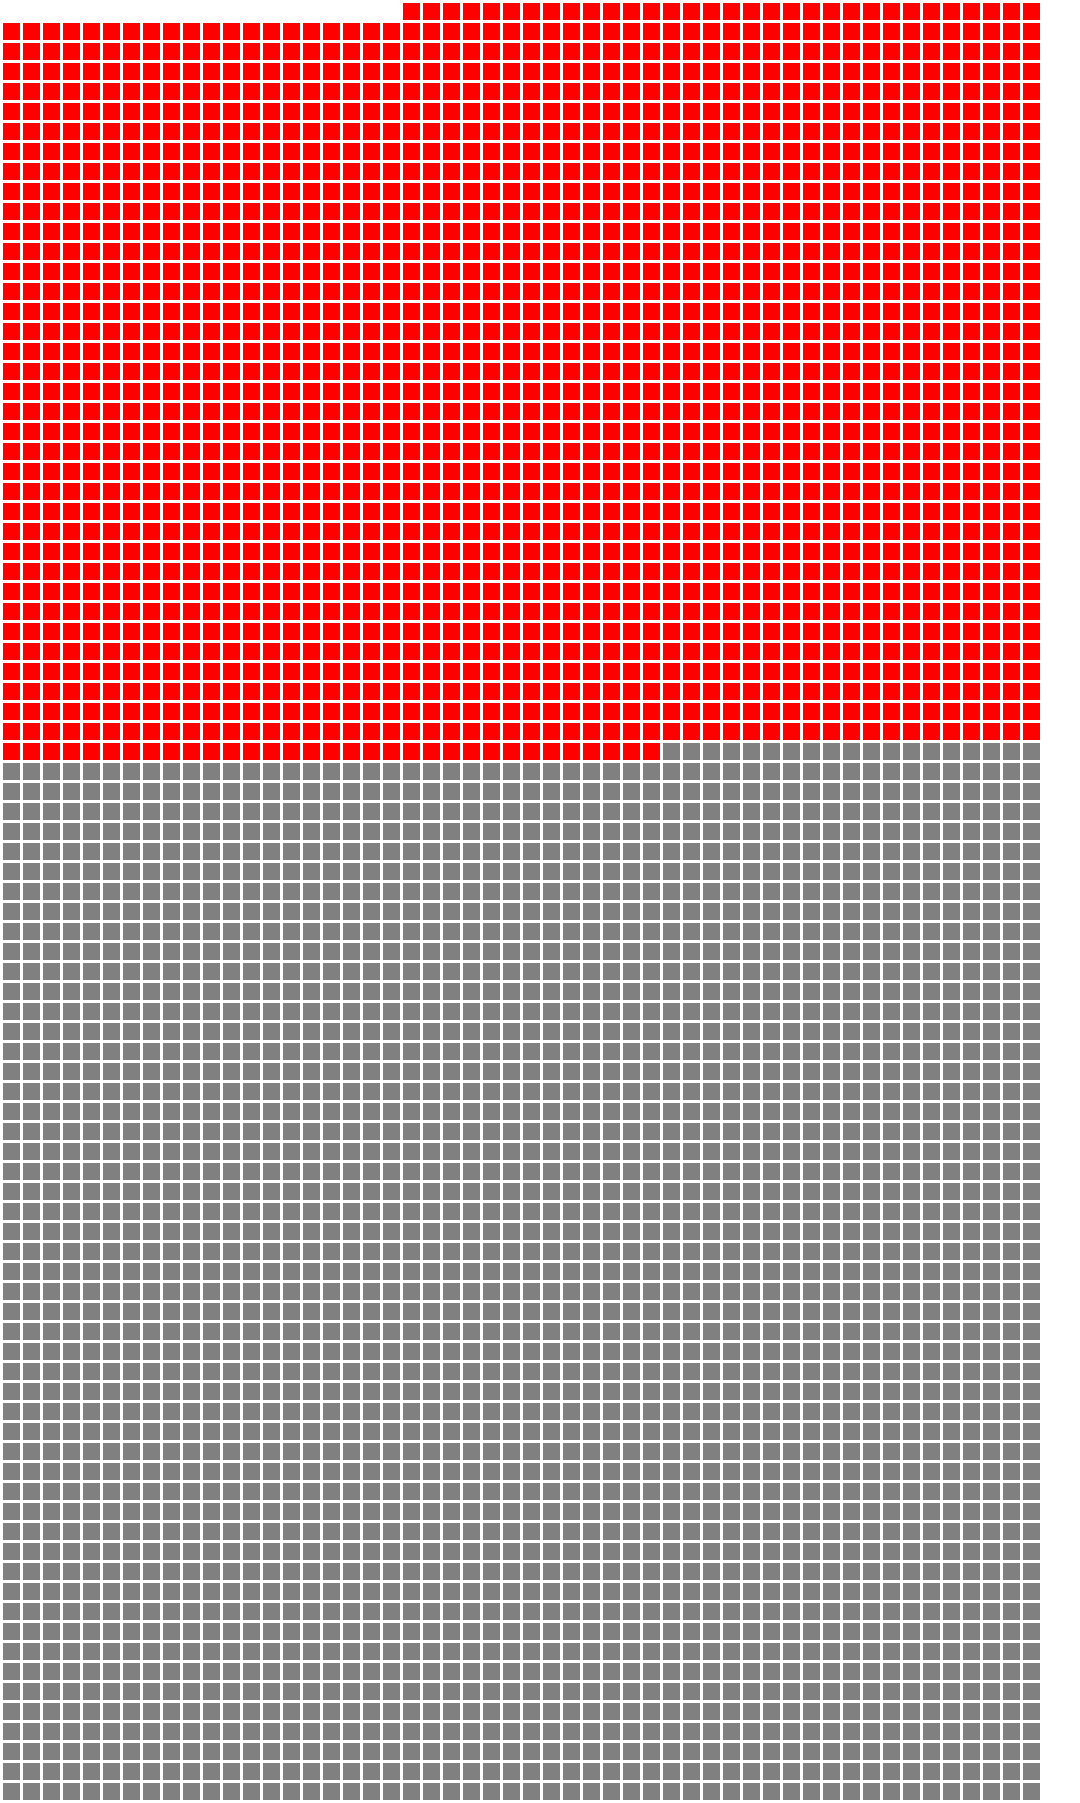

In [73]:
d

In [79]:
fileName = './images/linkedin'

# d.saveSvg('{}.svg'.format(fileName))
d.save_png('{}.png'.format(fileName))
